#9. Restaurant

Zomato는 인도의 맛집/음식 배달 웹 사이트이다.  
이 데이터는 2019 년 3 월 15 일까지 zomato 웹 사이트에서 제공되는 데이터를 담고 있다.
*   Data from: https://www.kaggle.com/himanshupoddar/zomato-bangalore-restaurants

In [1]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
zmt = pd.read_csv('/content/drive/MyDrive/Data/2. 실습자료/Ch 09_파이썬 실습 Restaurant/zomato.csv') #~16 sec

In [3]:
zmt.head(3)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari


# Columns Info
* url : Zomato 사이트의 URL
* address : 식당 주소
* name : 식당 이름
* online_order : 온라인 주문 가능 여부(Yes/No)
* book_table : 테이블 예약 가능 여부(Yes/No)
* rate : 식당 평점(5점 만점)
* votes : 평점 참여 횟수
* phone : 식당 전화번호
* location : 식당 위치
* rest_type : 레스토랑 타입
* dish_liked : 인기 메뉴
* cuisines : 메뉴 타입
* approx_cost(for two people) : 대략적인 가격(두 사람 기준)
*reviews_list : 평점과 리뷰로 구성된 후기 정보
* menu_item : 레스토랑에서 주문 가능한 메뉴
* listed_in(type) : 식사 종류
* listed_in(city) : 레스토랑 위치

In [4]:
zmt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [5]:
print("Total number of data : ", zmt.shape[0] * zmt.shape[1])
print("Total number of missin value : {} = {:.2f}% of total data ".format(zmt.isnull().sum().sum(), (zmt.isnull().sum().sum()*100)/(zmt .shape[0]*zmt.shape[1])))
print("Total number of restaurants: ", zmt['name'].nunique())

Total number of data :  879189
Total number of missin value : 37700 = 4.29% of total data 
Total number of restaurants:  8792


* 방갈로르에 가장 많은 레스토랑은 어디인가?  
* 방갈로르의 레스토랑 운영 형태는?  
* 방갈로르의 어느 지역에 레스토랑이 가장 많은가?  
* 온라인 주문/테이블 예약이 금액과 평점에 영향을 주는가?  
* 레스토랑의 종류 별로 메뉴가 다를까?
* 레스토랑 리뷰를 분석할 수 있을까?

In [6]:
zmt = zmt.drop(['url', 'phone', 'menu_item'], axis = 1)
zmt.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


In [7]:
zmt.duplicated().sum()

50

In [8]:
zmt.drop_duplicates(inplace = True)
zmt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51667 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      51667 non-null  object
 1   name                         51667 non-null  object
 2   online_order                 51667 non-null  object
 3   book_table                   51667 non-null  object
 4   rate                         43902 non-null  object
 5   votes                        51667 non-null  int64 
 6   location                     51646 non-null  object
 7   rest_type                    51440 non-null  object
 8   dish_liked                   23626 non-null  object
 9   cuisines                     51622 non-null  object
 10  approx_cost(for two people)  51322 non-null  object
 11  reviews_list                 51667 non-null  object
 12  listed_in(type)              51667 non-null  object
 13  listed_in(city)              51

In [9]:
zmt.isnull().sum()

address                            0
name                               0
online_order                       0
book_table                         0
rate                            7765
votes                              0
location                          21
rest_type                        227
dish_liked                     28041
cuisines                          45
approx_cost(for two people)      345
reviews_list                       0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [10]:
zmt.dropna(how='any', inplace = True)
zmt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23394 entries, 0 to 51715
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      23394 non-null  object
 1   name                         23394 non-null  object
 2   online_order                 23394 non-null  object
 3   book_table                   23394 non-null  object
 4   rate                         23394 non-null  object
 5   votes                        23394 non-null  int64 
 6   location                     23394 non-null  object
 7   rest_type                    23394 non-null  object
 8   dish_liked                   23394 non-null  object
 9   cuisines                     23394 non-null  object
 10  approx_cost(for two people)  23394 non-null  object
 11  reviews_list                 23394 non-null  object
 12  listed_in(type)              23394 non-null  object
 13  listed_in(city)              23

In [11]:
zmt.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'listed_in(type)',
       'listed_in(city)'],
      dtype='object')

In [12]:
zmt = zmt.rename(columns={'approx_cost(for two people)':'cost',
                                'listed_in(type)':'type',
                                'listed_in(city)':'city'})
zmt.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'type', 'city'],
      dtype='object')

In [13]:
print(zmt['cost'].unique())

['800' '300' '600' '700' '550' '500' '450' '650' '400' '750' '200' '850'
 '1,200' '150' '350' '250' '1,500' '1,300' '1,000' '100' '900' '1,100'
 '1,600' '950' '230' '1,700' '1,400' '1,350' '2,200' '2,000' '1,800'
 '1,900' '180' '330' '2,500' '2,100' '3,000' '2,800' '3,400' '40' '1,250'
 '3,500' '4,000' '2,400' '1,450' '3,200' '6,000' '1,050' '4,100' '2,300'
 '120' '2,600' '5,000' '3,700' '1,650' '2,700' '4,500']


In [14]:
zmt['cost'] = zmt['cost'].astype(str)
zmt['cost'] = zmt['cost'].replace(',', '', regex = True)
zmt['cost'] = zmt['cost'].astype(float)
zmt['cost'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        750.,  200.,  850., 1200.,  150.,  350.,  250., 1500., 1300.,
       1000.,  100.,  900., 1100., 1600.,  950.,  230., 1700., 1400.,
       1350., 2200., 2000., 1800., 1900.,  180.,  330., 2500., 2100.,
       3000., 2800., 3400.,   40., 1250., 3500., 4000., 2400., 1450.,
       3200., 6000., 1050., 4100., 2300.,  120., 2600., 5000., 3700.,
       1650., 2700., 4500.])

In [15]:
print(zmt['rate'].unique())

['4.1/5' '3.8/5' '3.7/5' '4.6/5' '4.0/5' '4.2/5' '3.9/5' '3.0/5' '3.6/5'
 '2.8/5' '4.4/5' '3.1/5' '4.3/5' '2.6/5' '3.3/5' '3.5/5' '3.8 /5' '3.2/5'
 '4.5/5' '2.5/5' '2.9/5' '3.4/5' '2.7/5' '4.7/5' 'NEW' '2.4/5' '2.2/5'
 '2.3/5' '4.8/5' '3.9 /5' '4.2 /5' '4.0 /5' '4.1 /5' '2.9 /5' '2.7 /5'
 '2.5 /5' '2.6 /5' '4.5 /5' '4.3 /5' '3.7 /5' '4.4 /5' '4.9/5' '2.1/5'
 '2.0/5' '1.8/5' '3.4 /5' '3.6 /5' '3.3 /5' '4.6 /5' '4.9 /5' '3.2 /5'
 '3.0 /5' '2.8 /5' '3.5 /5' '3.1 /5' '4.8 /5' '2.3 /5' '4.7 /5' '2.4 /5'
 '2.1 /5' '2.2 /5' '2.0 /5' '1.8 /5']


In [16]:
zmt['rate'] = zmt['rate'].astype(str)
zmt['rate'] = zmt['rate'].replace('/5', '', regex = True)
zmt['rating'] = zmt['rate'].replace('NEW', '-', regex = True)

zmt = zmt.loc[zmt['rate'] != 'NEW'].reset_index(drop=True)

In [17]:
zmt['rating'] = zmt['rating'].replace('-', '0', regex = True)
zmt['rating'] = zmt['rating'].astype(float)

In [18]:
zmt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23247 entries, 0 to 23246
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       23247 non-null  object 
 1   name          23247 non-null  object 
 2   online_order  23247 non-null  object 
 3   book_table    23247 non-null  object 
 4   rate          23247 non-null  object 
 5   votes         23247 non-null  int64  
 6   location      23247 non-null  object 
 7   rest_type     23247 non-null  object 
 8   dish_liked    23247 non-null  object 
 9   cuisines      23247 non-null  object 
 10  cost          23247 non-null  float64
 11  reviews_list  23247 non-null  object 
 12  type          23247 non-null  object 
 13  city          23247 non-null  object 
 14  rating        23247 non-null  float64
dtypes: float64(2), int64(1), object(12)
memory usage: 2.7+ MB


In [19]:
zmt.head(5)

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,type,city,rating
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari,4.1
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari,4.1
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari,3.8
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari,3.7
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari,3.8


In [20]:
zmt['online_order'] = zmt['online_order'].map({"Yes" : 1, "No" : 0}).astype(int)
zmt['book_table'] = zmt['book_table'].map({"Yes" : 1, "No" : 0}).astype(int)
zmt.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,type,city,rating
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari,4.1
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari,4.1
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari,3.8
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari,3.7
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari,3.8


Text(0, 0.5, 'restaurant name')

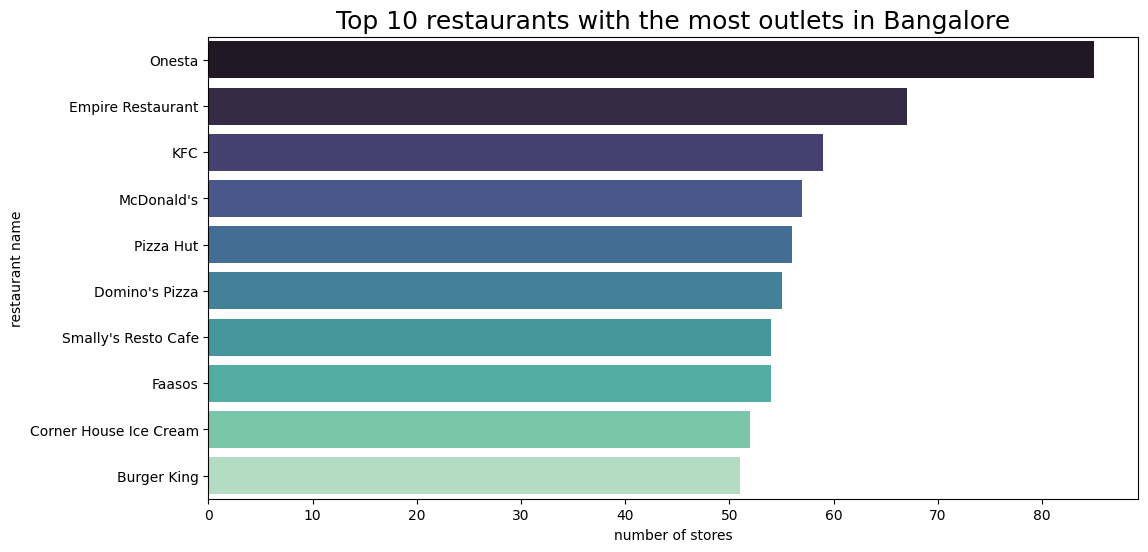

In [21]:
f, ax = plt.subplots(1, 1, figsize = (12,6))

sns.barplot(x= zmt['name'].value_counts()[:10],y = zmt['name'].value_counts()[:10].index, palette = 'mako')
plt.title('Top 10 restaurants with the most outlets in Bangalore', size=18)
plt.xlabel('number of stores')
plt.ylabel('restaurant name')

Text(0, 0.5, 'restaurant type')

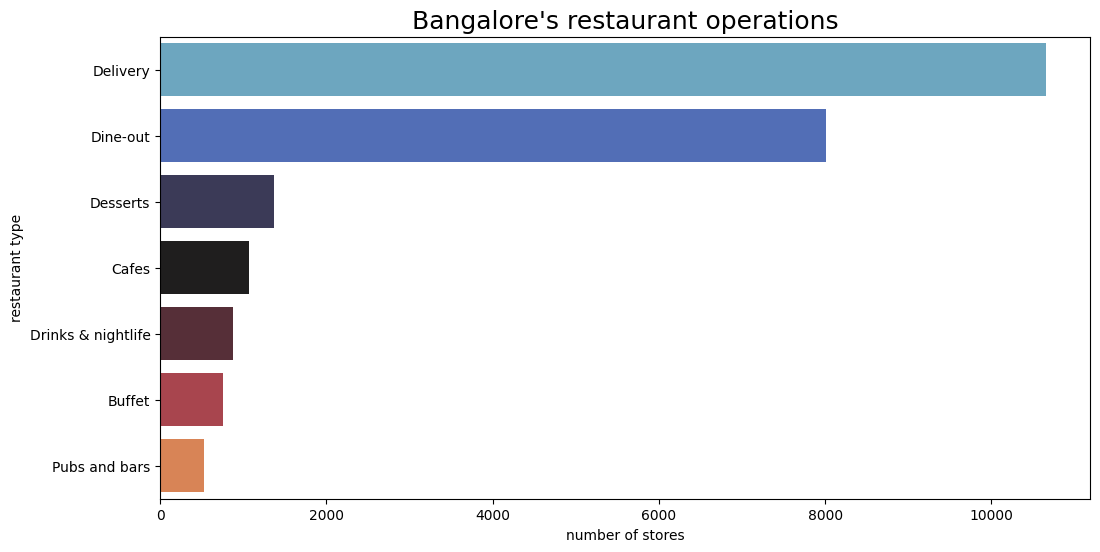

In [26]:
plt.figure(figsize = (12,6))

sns.barplot(x= zmt['type'].value_counts()[:15],y = zmt['type'].value_counts()[:15].index,palette = 'icefire')
plt.title("Bangalore's restaurant operations", size = 18)
plt.xlabel('number of stores')
plt.ylabel('restaurant type')

Text(0.5, 0, '')

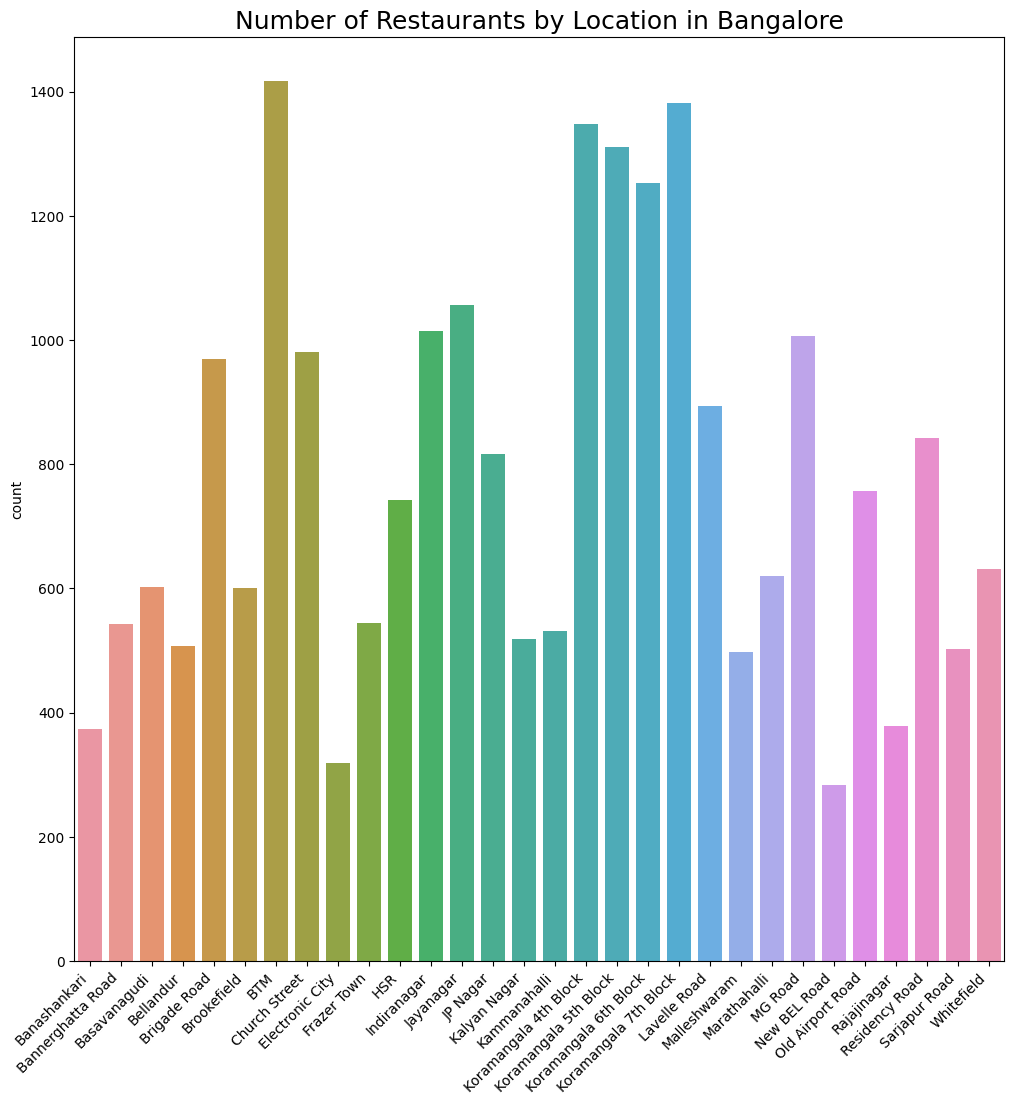

In [45]:
f, ax = plt.subplots(1, 1, figsize = (12,12))

sns.countplot(x = zmt['city'], ax=ax)
sns.countplot(x = zmt['city']).set_xticklabels(sns.countplot(x = zmt['city']).get_xticklabels(), rotation=45, ha="right")
plt.title('Number of Restaurants by Location in Bangalore', size=18)
plt.xlabel('')

Text(0, 0.5, '')

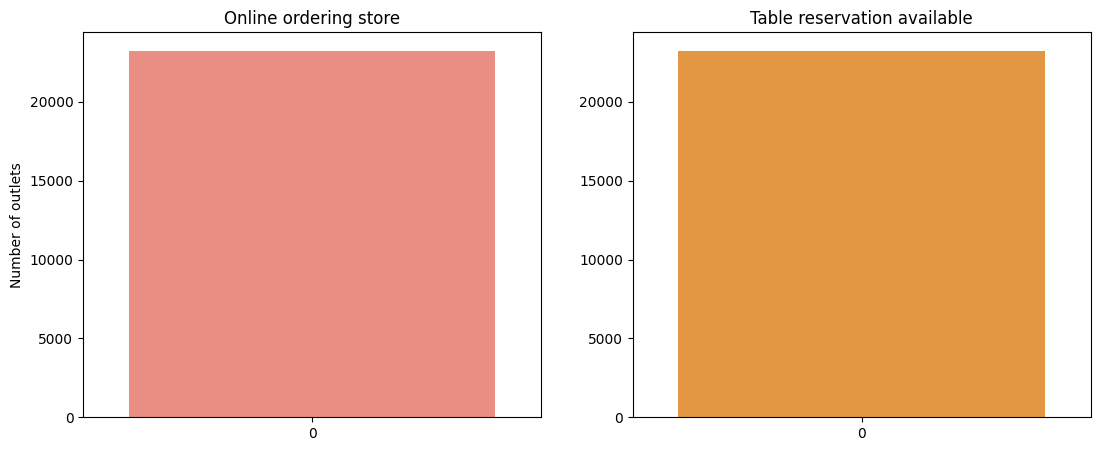

In [37]:
f, ax = plt.subplots(1, 2, figsize = (13,5))

sns.countplot(zmt['online_order'],palette = 'dark:salmon_r', ax=ax[0])

ax[0].set_title('Online ordering store')
ax[0].set_ylabel('Number of outlets')

sns.countplot(zmt['book_table'],palette = 'YlOrBr', ax=ax[1])
ax[1].set_title('Table reservation available')
ax[1].set_ylabel('')

(0.0, 2000.0)

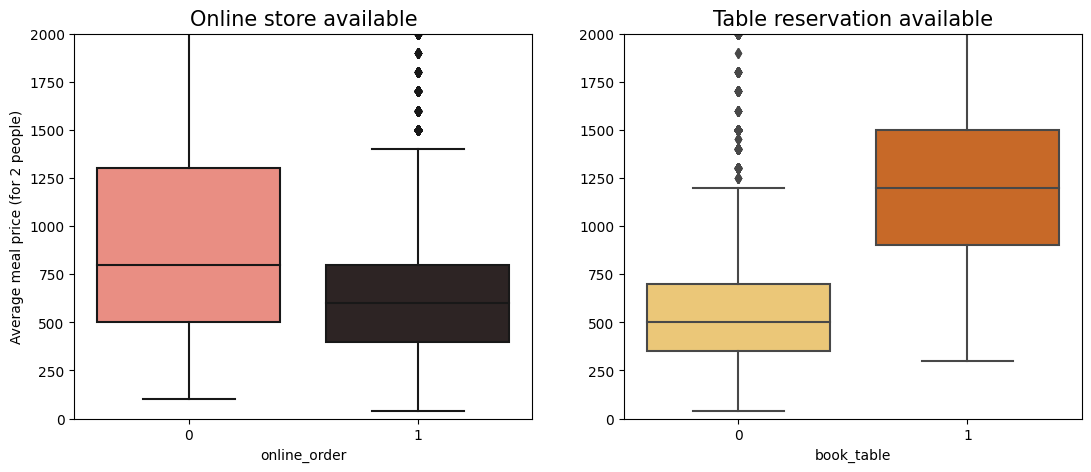

In [46]:
f, ax = plt.subplots(1, 2, figsize = (13,5))

sns.boxplot(x=zmt['online_order'], y=zmt['cost'], palette = 'dark:salmon_r', ax=ax[0])
ax[0].set_title('Online store available', size=15)
ax[0].set_ylabel('Average meal price (for 2 people)')
ax[0].set_ylim(0, 2000)

sns.boxplot(x=zmt['book_table'], y=zmt['cost'], palette = 'YlOrBr', ax=ax[1])
ax[1].set_title('Table reservation available', size=15)
ax[1].set_ylabel('')
ax[1].set_ylim(0, 2000)

<Axes: xlabel='book_table', ylabel='rating'>

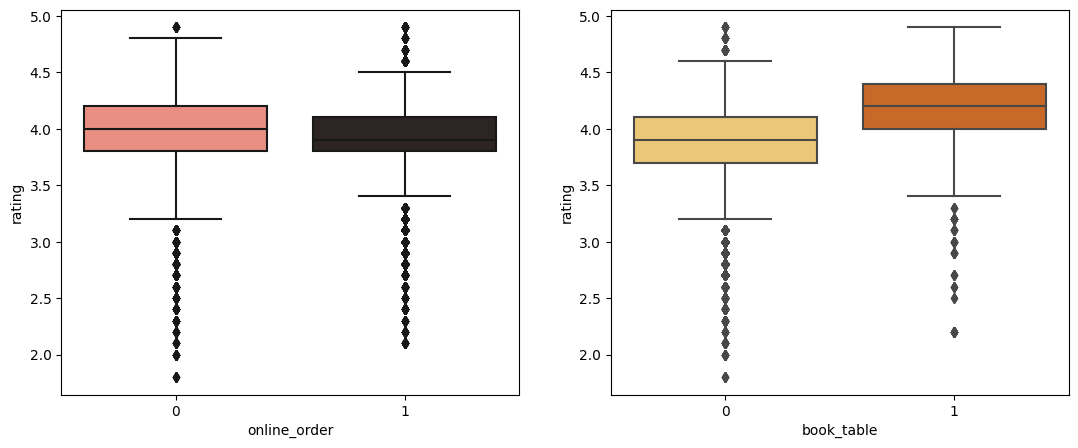

In [48]:
f, ax = plt.subplots(1, 2, figsize = (13, 5))

sns.boxplot(x = zmt['online_order'], y=zmt['rating'], palette = 'dark:salmon_r', ax = ax[0])
sns.boxplot(x=zmt['book_table'], y=zmt['rating'],  palette = 'YlOrBr', ax=ax[1])

In [49]:
pd.crosstab(zmt['rate'], zmt['online_order'])
a = pd.crosstab(zmt['rate'], zmt['online_order'])

In [50]:
pd.crosstab(zmt['rate'], zmt['book_table'])
b = pd.crosstab(zmt['rate'], zmt['book_table'])

Text(0.5, 0, 'Ratings')

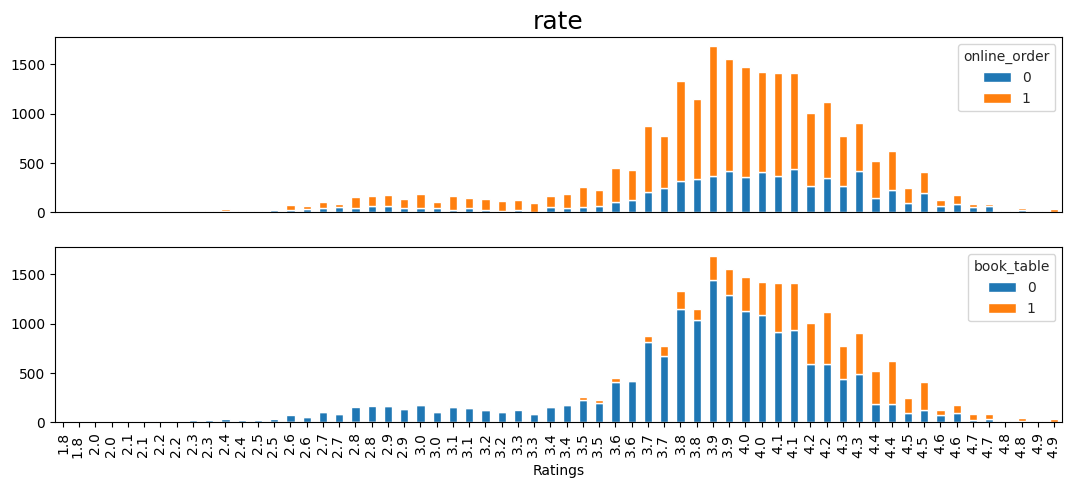

In [51]:
f, ax = plt.subplots(2, 1, figsize = (13,5))

sns.set_style('white')

a.plot(kind="bar",stacked=True, ax=ax[0])
ax[0].xaxis.set_visible(False)
ax[0].set_title('rate', size=18)
plt.ylabel('')
plt.xlabel('')


b.plot(kind="bar",stacked=True, ax=ax[1])
plt.ylabel('')
plt.xlabel('Ratings')

In [52]:
from wordcloud import WordCloud, STOPWORDS

In [53]:
zmt_re = zmt.copy()

In [54]:
rest=zmt_re['rest_type'].value_counts()[:3].index

In [55]:
def zomato_wordcloud(rest):
    plt.figure(figsize = (20,20))
    for i, rest_tp in enumerate(rest):
        plt.subplot(1,3,i+1)
        dishes = ''
        data = zmt_re[zmt_re['rest_type'] == rest_tp]
        for word in data['dish_liked']:
            words=word.split()
            dishes=dishes+ " ".join(words)+" "
        wordcloud = WordCloud(background_color='white', colormap = 'seismic', collocations=False, stopwords = stopwords, width=1200, height=1200).generate(dishes)
        plt.imshow(wordcloud)
        plt.title(rest_tp)
        plt.axis("off")


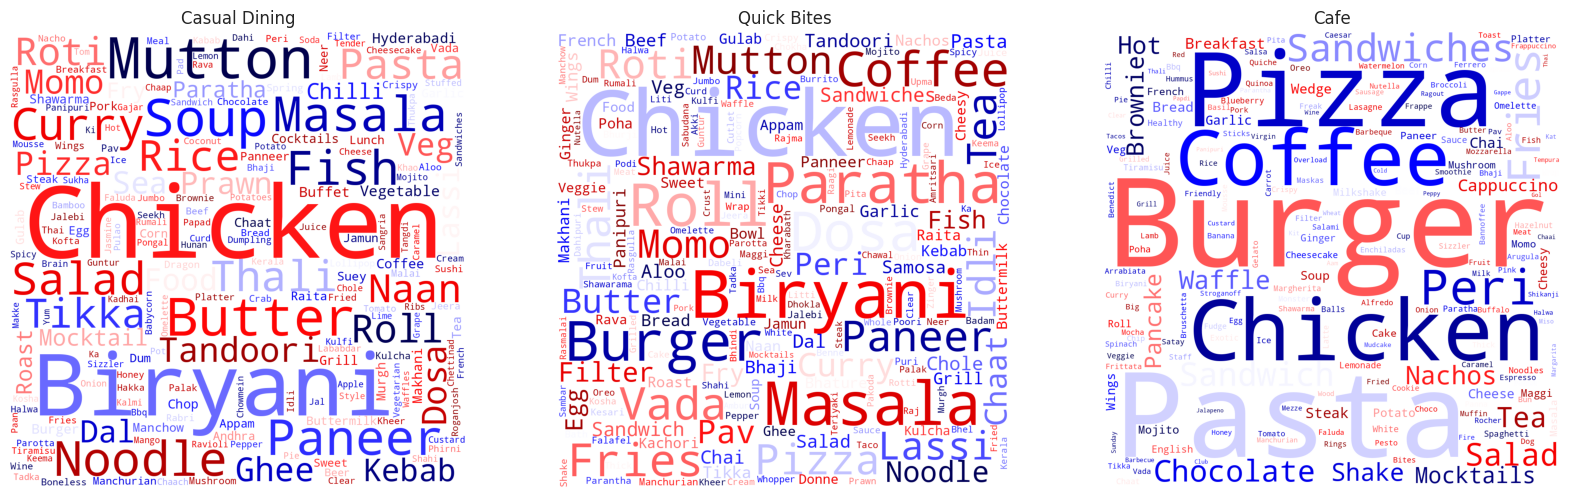

In [56]:
stopwords = set(STOPWORDS)
zomato_wordcloud(rest)

간단한 감정 분석 : 텍스트 분석 기술을 통해 텍스트 데이터 내에서 감정을 해석 분류하는 것

polarity 값이 양의 값일 경우 긍정, 음일 경우 부정, 0일 경우 중립단어

In [57]:
from textblob import TextBlob

In [58]:
sent_res = []
for i in range(0, len(zmt)):
    analysis = TextBlob(zmt.loc[i,'reviews_list'])
    if analysis.sentiment.polarity > 0:
        sent_res.append('positive')
    elif analysis.sentiment.polarity == 0:
        sent_res.append('neutral')
    else:
        sent_res.append('negative')
zmt['review_sent'] = sent_res

In [59]:
zmt.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,type,city,rating,review_sent
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari,4.1,positive
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari,4.1,positive
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari,3.8,positive
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari,3.7,positive
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari,3.8,positive


In [61]:
from plotly.subplots import make_subplots
import plotly.express as px

fig = px.scatter(zmt, x='rate', y='cost', size= 'votes', color = 'review_sent'
                  ,log_x = True, size_max = 60)
fig.show()

테이블 예약 가능 매장인 경우 금액대도 높고 평점도 좋았음.  
온라인 주문 여부는 금액과 평점에 큰 차이를 끼치지 않았음